### ***Initializing and Importing Packages***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from sklearn import preprocessing
import os
import networkx as nx
import seaborn as sns
import math

import Funcs

# sns.color_palette("Set2")
sns.set_theme()
# # For the image quality of the graphic. 
sns.set(rc={"figure.dpi":500})
# # For the size of the graphics
# sns.set(rc = {"figure.figsize":(4,4)})
#sns.set(font_scale = 0.5)

DataDir = "../../../Data/"
FigsDir = "../../../Figs/"




In [6]:
DataDir = DataDir + 'Raw-Data/AlphaVantage/15min-Data'
symboles, markets, cryptos = Funcs.PrepDataNames(DataDir)

#### ***Plotting the Returns*** 

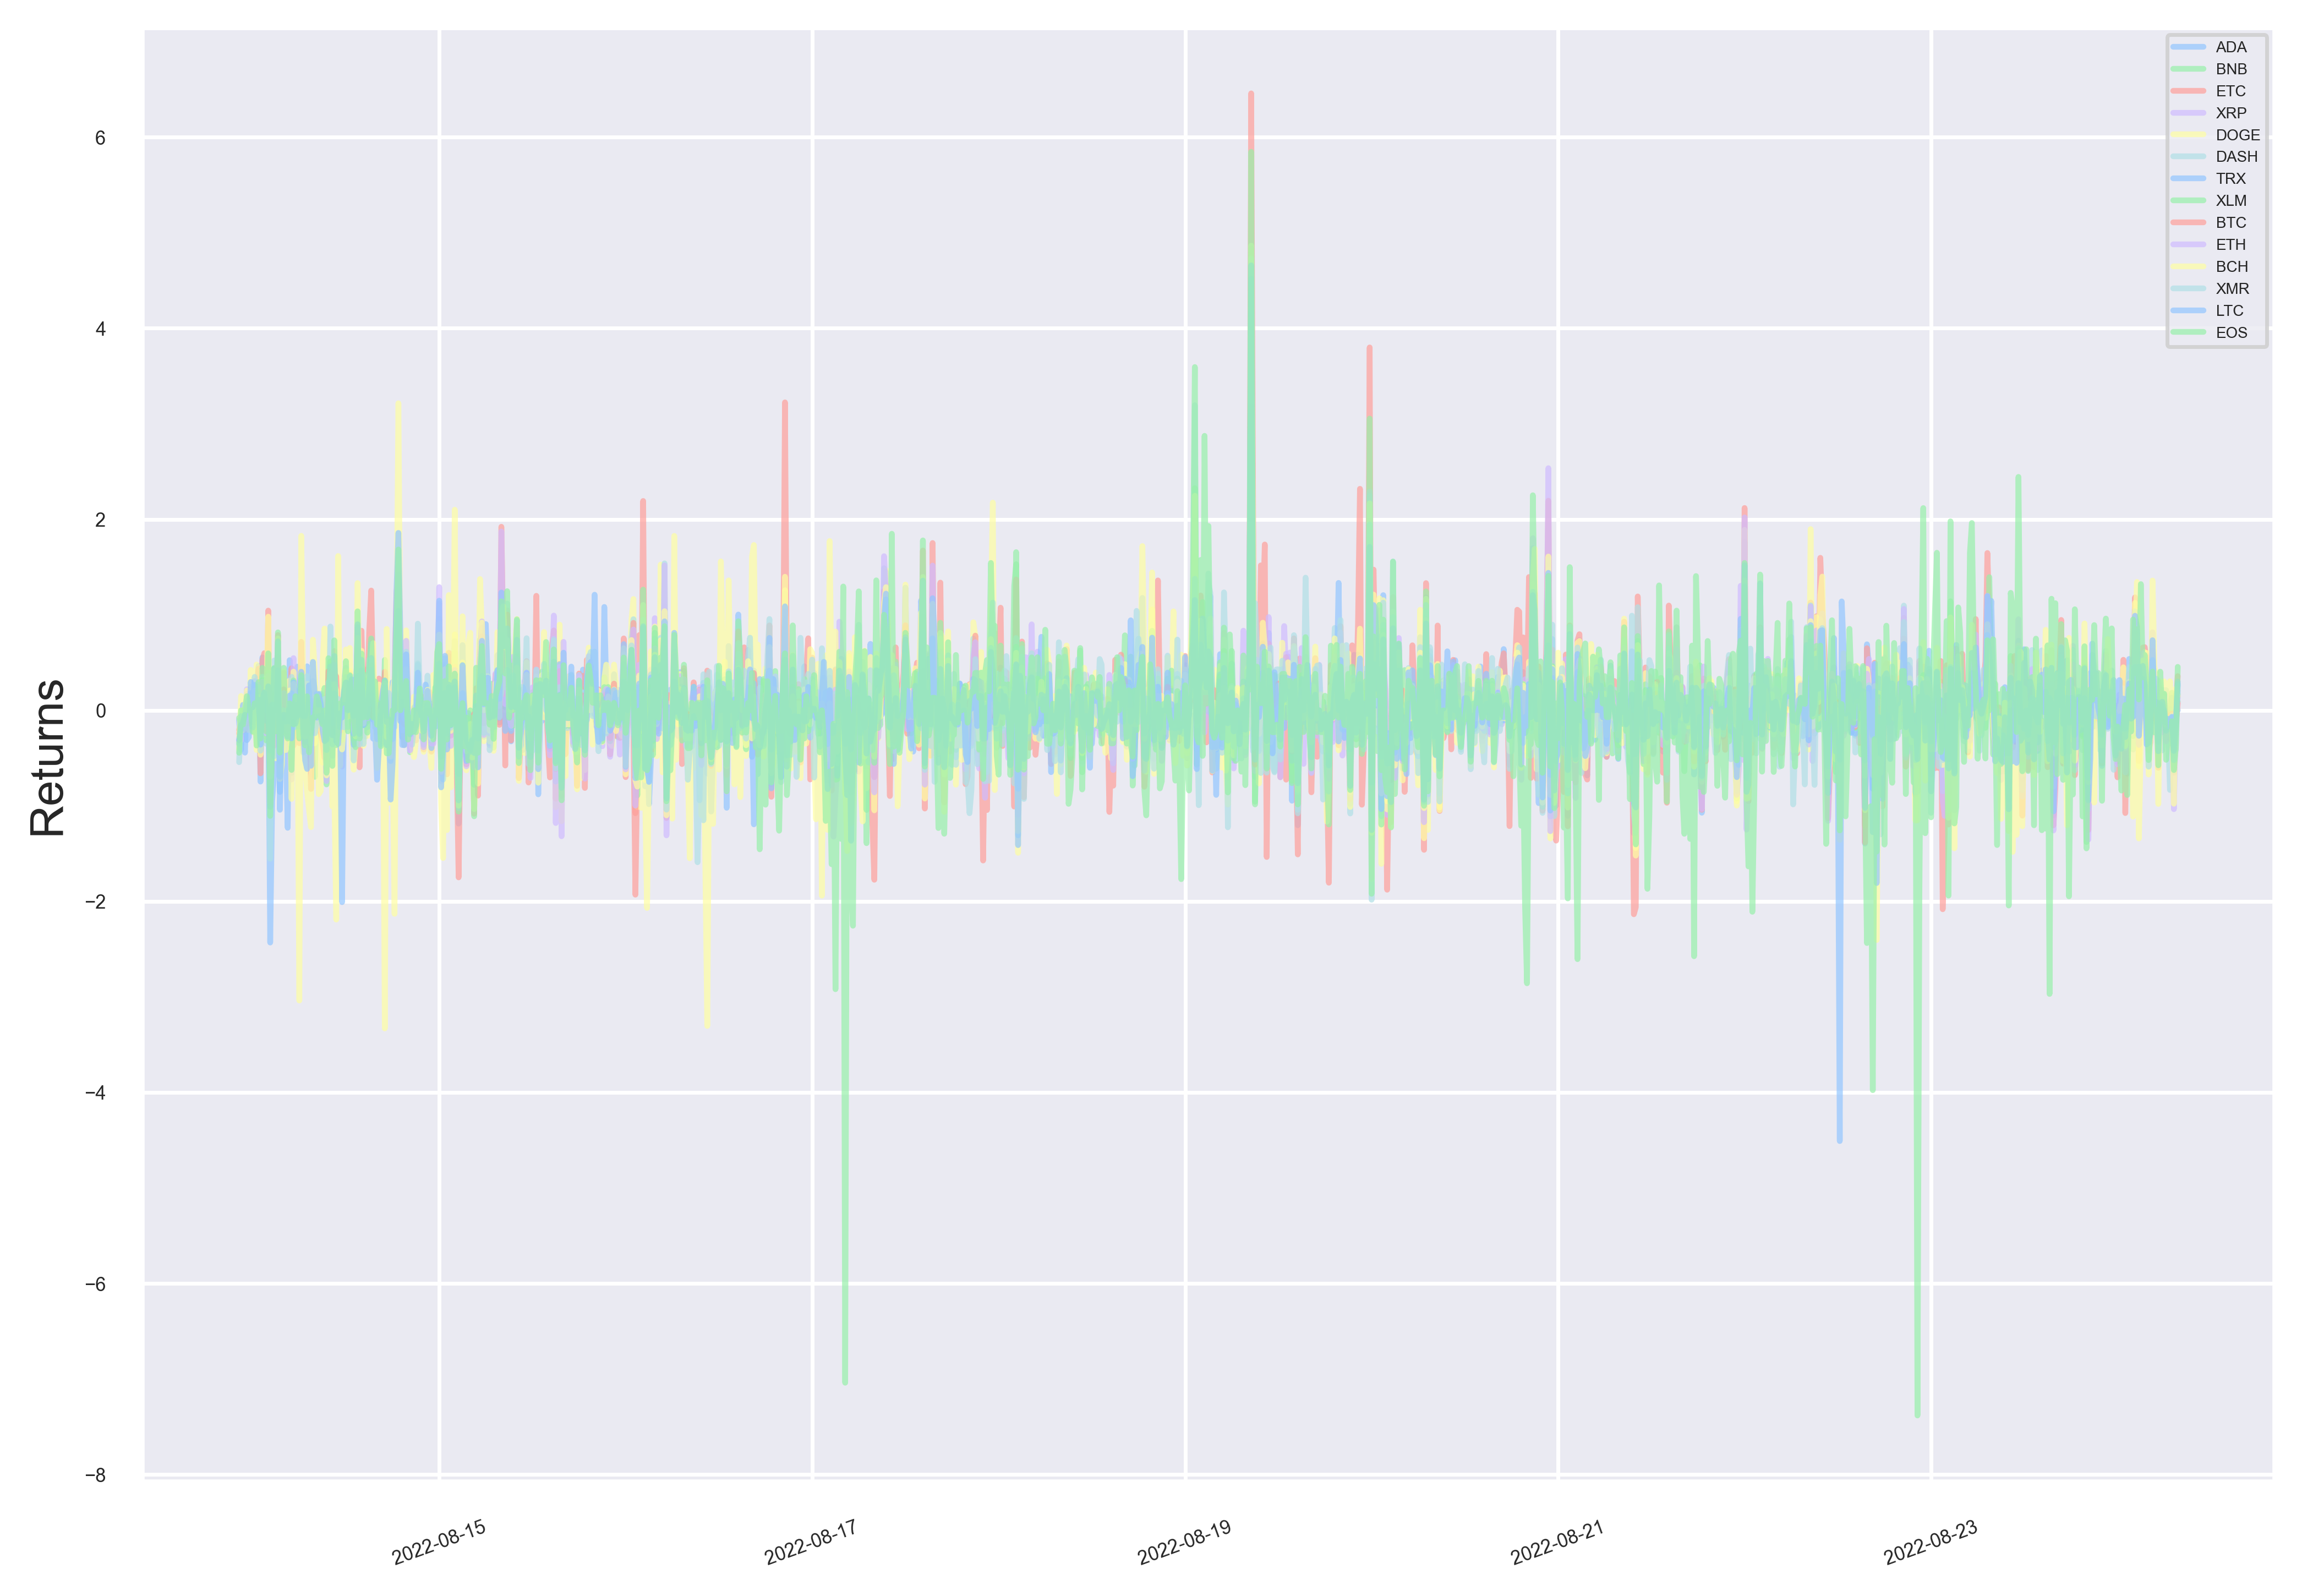

In [7]:
#Minutly Returns of coins in US Market
ReturnDict= Funcs.LoadData(DataDir, symboles, markets, cryptos)
ReturnDF_Time= pd.DataFrame.from_dict(ReturnDict['Timestamp'])
ReturnDF_USD = pd.DataFrame.from_dict(ReturnDict['USD'])
plt.style.use('seaborn-pastel')
plt.figure(figsize = (10,7))
for crypto in cryptos:
    plt.plot(ReturnDF_Time, ReturnDF_USD['%s' % crypto], label = '%s' % crypto, alpha = 0.7)

plt.xticks(rotation=20, fontsize = 5)
plt.yticks(fontsize = 5)
plt.ylabel('Returns')
plt.legend(loc=1, prop={'size': 4})
plt.savefig(FigsDir + '/stage-8/stationary.jpg', bbox_inches='tight')
plt.show()

### ***The Eddy-Fuller test***

In [7]:
Funcs.Eddy_Fuller_test(ReturnDF_USD, cryptos)

p-value (XLM) = 0.0 
p-value (DASH) = 7.788190789203972e-17 
p-value (BNB) = 0.0 
p-value (BCH) = 1.1031948106402074e-28 
p-value (TRX) = 5.4415764740998084e-30 
p-value (ETC) = 1.0634100991239234e-25 
p-value (XMR) = 0.0 
p-value (ETH) = 0.0 
p-value (DOGE) = 0.0 
p-value (XRP) = 0.0 
p-value (LTC) = 0.0 
p-value (BTC) = 8.220178396092641e-25 
p-value (EOS) = 0.0 
p-value (ADA) = 0.0 


### ***Optimum Lag***

In [8]:
maxlag_ = 12
Funcs.Optimum_lag(ReturnDF_USD,maxlag_)

,AIC,BIC,FPE,HQIC
0,-38.04*,-37.97*,3.029e-17*,-38.01*
1,-37.95,-36.91,3.300e-17,-37.55
2,-37.82,-35.80,3.770e-17,-37.05
3,-37.68,-34.69,4.343e-17,-36.54
4,-37.53,-33.57,5.032e-17,-36.02
5,-37.34,-32.41,6.107e-17,-35.46
6,-37.14,-31.24,7.474e-17,-34.89
7,-37.01,-30.13,8.565e-17,-34.39
8,-36.85,-29.01,1.002e-16,-33.87
9,-36.72,-27.90,1.154e-16,-33.36


### ***Granger-Cause Test***

In [8]:
maxlag_ = 5
P_val_Dataframe, F_val_Dataframe = Funcs.grangers_causation_matrix(ReturnDF_USD, maxlag_, variables=ReturnDF_USD.columns)


In [10]:
F_val_Dataframe #the dataframe consisting of the F scores for lag = 4

,XLM_x,DASH_x,BNB_x,BCH_x,TRX_x,ETC_x,XMR_x,ETH_x,DOGE_x,XRP_x,LTC_x,BTC_x,EOS_x,ADA_x
XLM_y,0.0000,0.8618,0.9902,1.3397,2.9870,1.0537,1.4084,0.2395,1.4467,0.9368,0.8307,1.7943,1.3515,1.5972
DASH_y,1.6502,0.0000,0.3748,1.8928,2.5566,0.7017,0.8173,1.1839,1.2863,0.2665,0.5529,3.0073,0.2295,0.4928
BNB_y,1.2840,0.8837,0.0000,0.4694,1.6250,0.4486,1.0086,0.8448,0.5175,0.4574,0.4299,1.4784,0.1762,0.5979
BCH_y,0.4130,0.7823,3.8016,0.0000,2.4472,1.6955,1.7351,0.9732,2.3820,2.1030,0.5819,1.0743,0.3687,2.1470
TRX_y,0.9631,0.6931,1.7654,1.1429,0.0000,0.5648,0.3073,1.6795,1.3931,1.2202,0.2671,2.0726,0.7277,0.7703
ETC_y,0.7130,0.2749,1.3351,0.4666,1.4870,0.0000,3.3912,1.3585,0.4566,0.5704,0.3334,1.1674,0.5122,1.6240
XMR_y,0.4582,0.9522,2.0254,0.4748,2.1174,1.5637,0.0000,0.6967,2.8384,0.8901,1.2291,1.9259,0.6898,1.1168
ETH_y,1.4782,1.4125,3.6448,1.4165,2.9097,1.0463,1.1004,0.0000,1.9279,0.5958,1.3084,1.2982,0.4434,2.7994
DOGE_y,0.1757,0.3545,1.5797,0.2170,1.2447,0.5453,1.2365,0.6214,0.0000,0.8963,0.6156,0.4045,0.8238,0.8465
XRP_y,2.9687,1.5041,1.1888,1.4892,3.0188,1.7138,2.6695,2.1620,3.4491,0.0000,0.9754,2.9447,0.2902,2.8091


In [11]:
P_val_Dataframe #the dataframe consisting the minimum p-values

,XLM_x,DASH_x,BNB_x,BCH_x,TRX_x,ETC_x,XMR_x,ETH_x,DOGE_x,XRP_x,LTC_x,BTC_x,EOS_x,ADA_x
XLM_y,1.0000,0.1468,0.3624,0.0955,0.0008,0.3773,0.0176,0.8773,0.1983,0.4489,0.2303,0.1062,0.2333,0.1216
DASH_y,0.0547,1.0000,0.7732,0.0358,0.0102,0.2483,0.1469,0.1802,0.1484,0.8835,0.1771,0.0095,0.5703,0.4562
BNB_y,0.0710,0.1486,1.0000,0.2886,0.0405,0.2586,0.2097,0.2705,0.3110,0.8028,0.4203,0.1877,0.6937,0.6265
BCH_y,0.7726,0.4229,0.0013,1.0000,0.0175,0.1274,0.0310,0.0714,0.0342,0.0221,0.4754,0.2893,0.7386,0.0425
TRX_y,0.2461,0.5932,0.0098,0.2535,1.0000,0.4129,0.4898,0.0594,0.2174,0.0953,0.6162,0.0461,0.2925,0.3111
ETC_y,0.2965,0.2779,0.0229,0.4903,0.0338,1.0000,0.0007,0.0791,0.7525,0.1398,0.2663,0.1733,0.1308,0.0235
XMR_y,0.2820,0.2028,0.0368,0.3617,0.0310,0.0878,1.0000,0.4681,0.0135,0.1302,0.1272,0.0187,0.3763,0.3235
ETH_y,0.0435,0.1306,0.0012,0.0708,0.0057,0.2887,0.2144,1.0000,0.0827,0.4400,0.1828,0.1583,0.5124,0.0097
DOGE_y,0.9431,0.7255,0.0376,0.8670,0.2294,0.2454,0.0886,0.0859,1.0000,0.0560,0.2006,0.1989,0.2721,0.3900
XRP_y,0.0020,0.1551,0.3052,0.1274,0.0059,0.1232,0.0048,0.0151,0.0037,1.0000,0.3151,0.0055,0.7329,0.0077


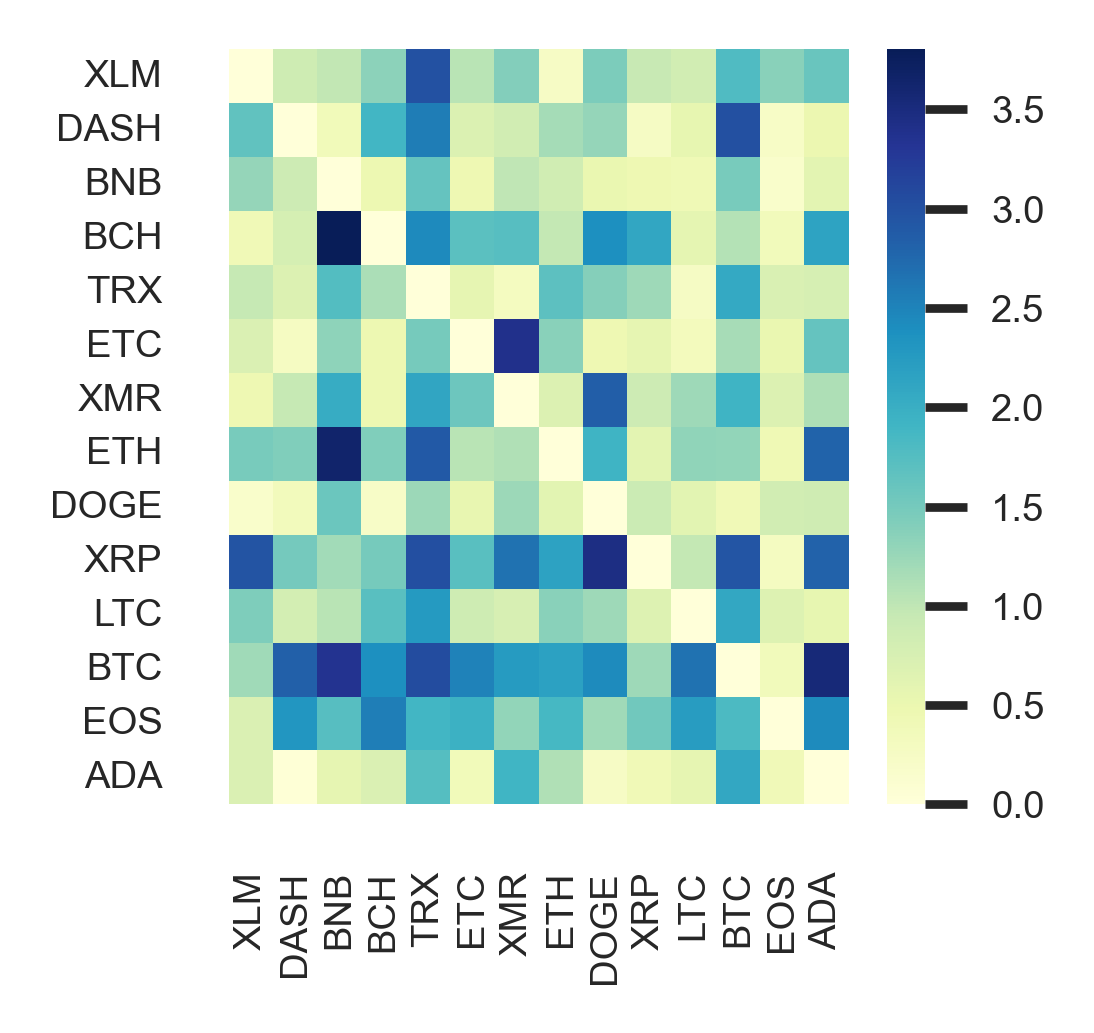

In [13]:
#'Heatmap Plots for Granger-Causality Test Results,'
#F-scores
sns.set(font_scale = 0.5)
plt.figure(figsize = (2,2))
sns.heatmap(F_val_Dataframe, annot = False, cmap="YlGnBu",xticklabels=cryptos, yticklabels=cryptos , cbar = True)
#plt.subplots_adjust(top=0.8)
plt.savefig(FigsDir + "/stage-8/Fvalues.jpg", bbox_inches='tight')


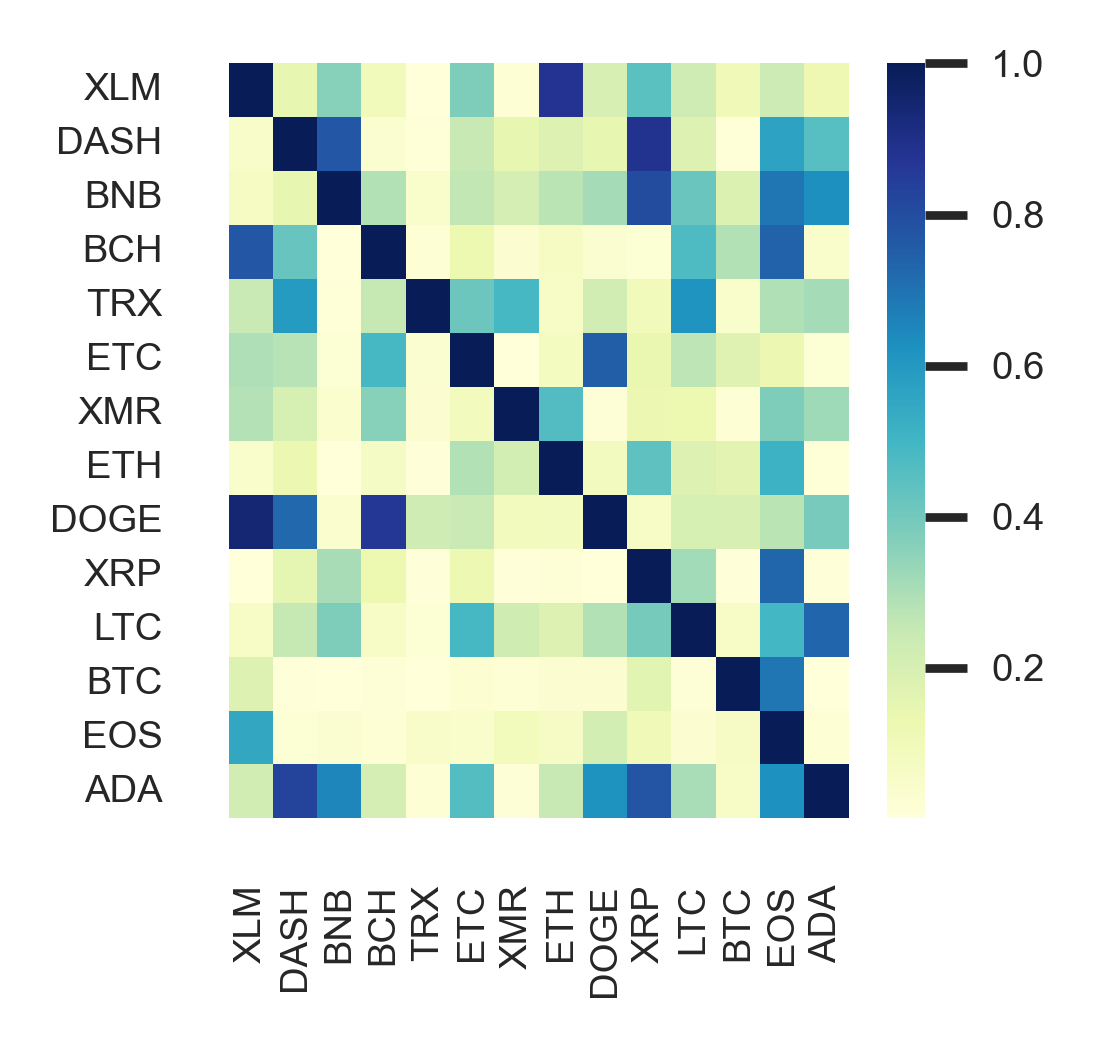

In [14]:
#'Heatmap Plots for Granger-Causality Test Results,'
#P-values
plt.figure(figsize = (2,2))
sns.heatmap(P_val_Dataframe, annot = False, cmap="YlGnBu", xticklabels=cryptos, yticklabels=cryptos , cbar = True )
#plt.subplots_adjust(top=0.8)
plt.savefig(FigsDir + "/stage-8/Pvalues.jpg", bbox_inches='tight')

### ***Graph***

In [ ]:
G_.edges(data=True)

In [9]:

def ScaleData(Dataframe):
    #Mat = np.array(Dataframe)
    scaler = preprocessing.MinMaxScaler(feature_range=(0,2))
    Mat = scaler.fit_transform(Dataframe)
    #Mat = 2 * (Mat - Mat.min()) / (Mat.max() - Mat.min()) -1
    # for i in range(len(Mat)):
    #     for j in range(len(Mat)):
    #         Mat[i,j] = round(Mat[i,j] , 1)
    # for i in range(len(Mat)):
    #     Mat[i,i] = 0.0
    return Mat

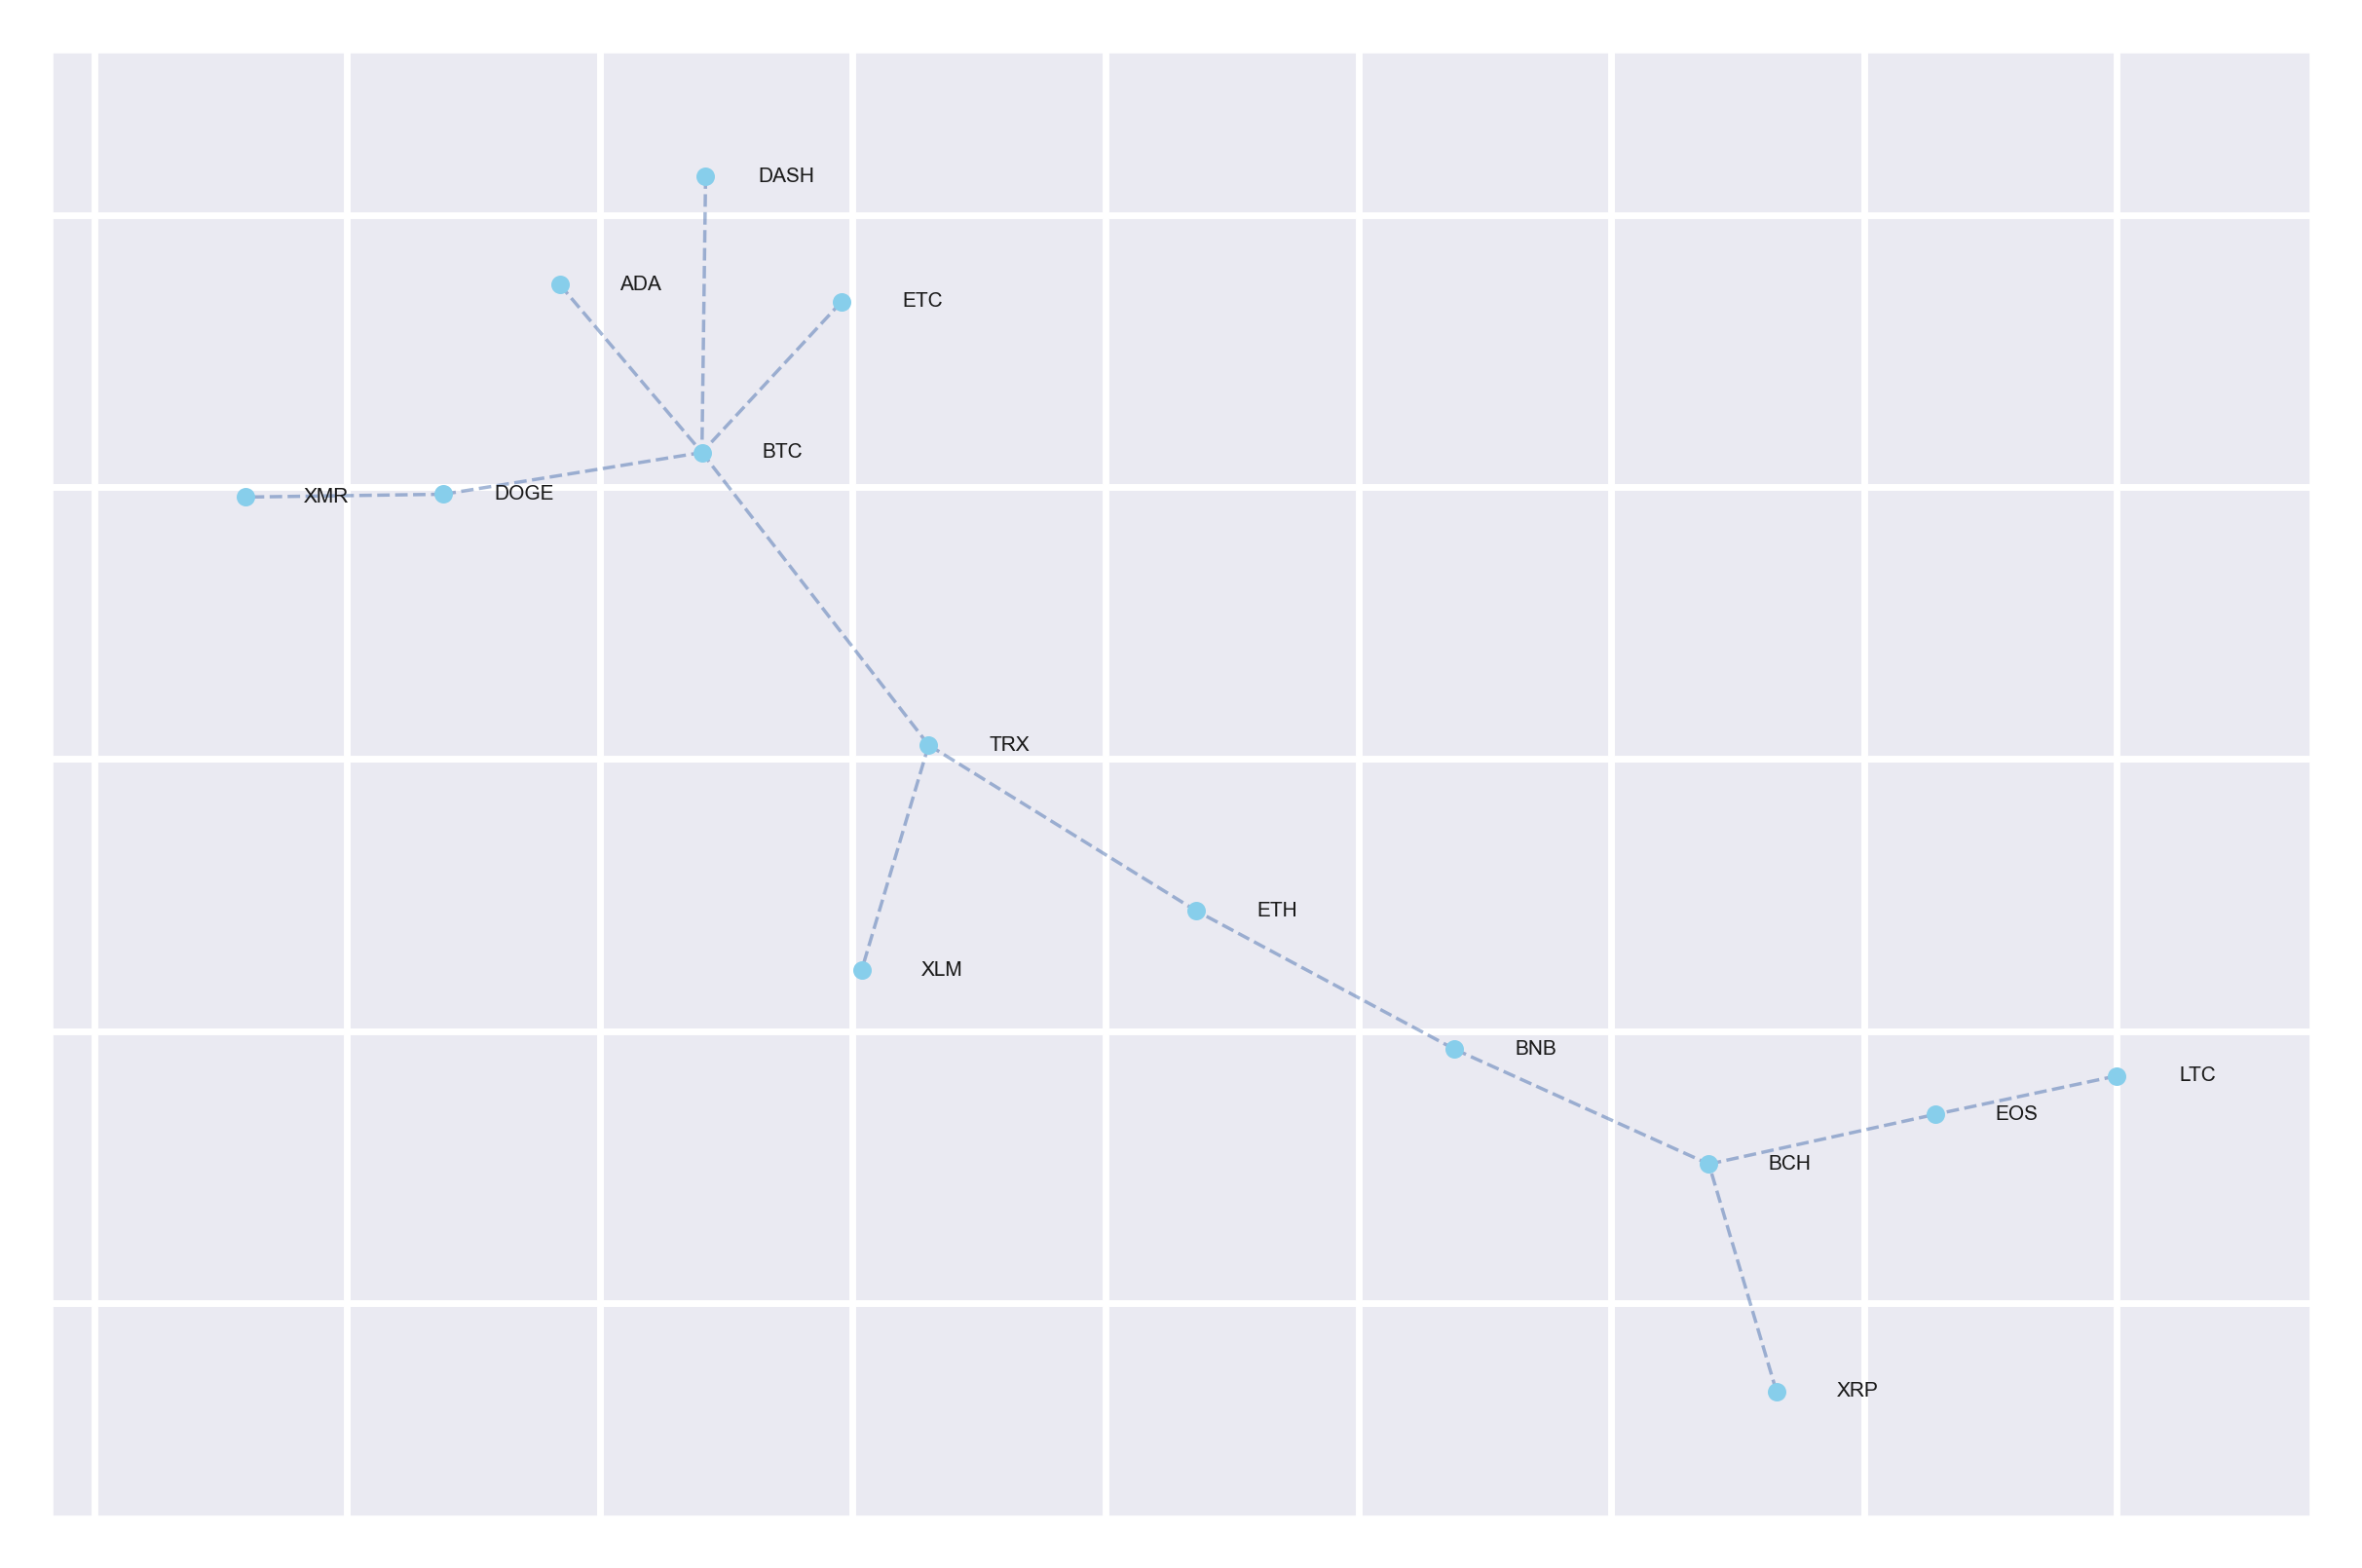

In [10]:
def CalculateDistance(c) : 
    return math.sqrt(2) * (1 - c)
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}
#Matrix_F = np.array(F_val_Dataframe)
#Matrix_FF = ScaleData(Matrix_F)

MAT = CalculateDistance(ScaleData(np.array(F_val_Dataframe)))
# Mat = CalculateDistance(MAT)

G_ = nx.from_numpy_array(MAT)

G=nx.minimum_spanning_tree(G_, algorithm='prim')

labels={}
for i in range(len(G.nodes())):
    labels[list(G.nodes)[i]] = cryptos[i]   
H = nx.relabel_nodes(G, labels)
pos = nx.spring_layout(H, seed=7, weight='length')
pos_nodes = nudge(pos, 0.08, 0)  

weight_labels = nx.get_edge_attributes(H,'weight')
# elarge = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] <= 0.5]
#, edgelist=esmall
#node_size = [v * 10 for v in d.values()]
d = dict(H.degree)
nx.draw_networkx_nodes(H, pos, node_size = 3 , node_color="skyblue")
nx.draw_networkx_labels(H, pos_nodes, font_size=3, font_family="sans-serif")
#nx.draw_networkx_edges(H, pos, width=0.5)
nx.draw_networkx_edges(
    H, pos, width=0.5, alpha=0.5, edge_color="b", style="dashed")

#plt.savefig('F_values_MSTgraph.jpg')


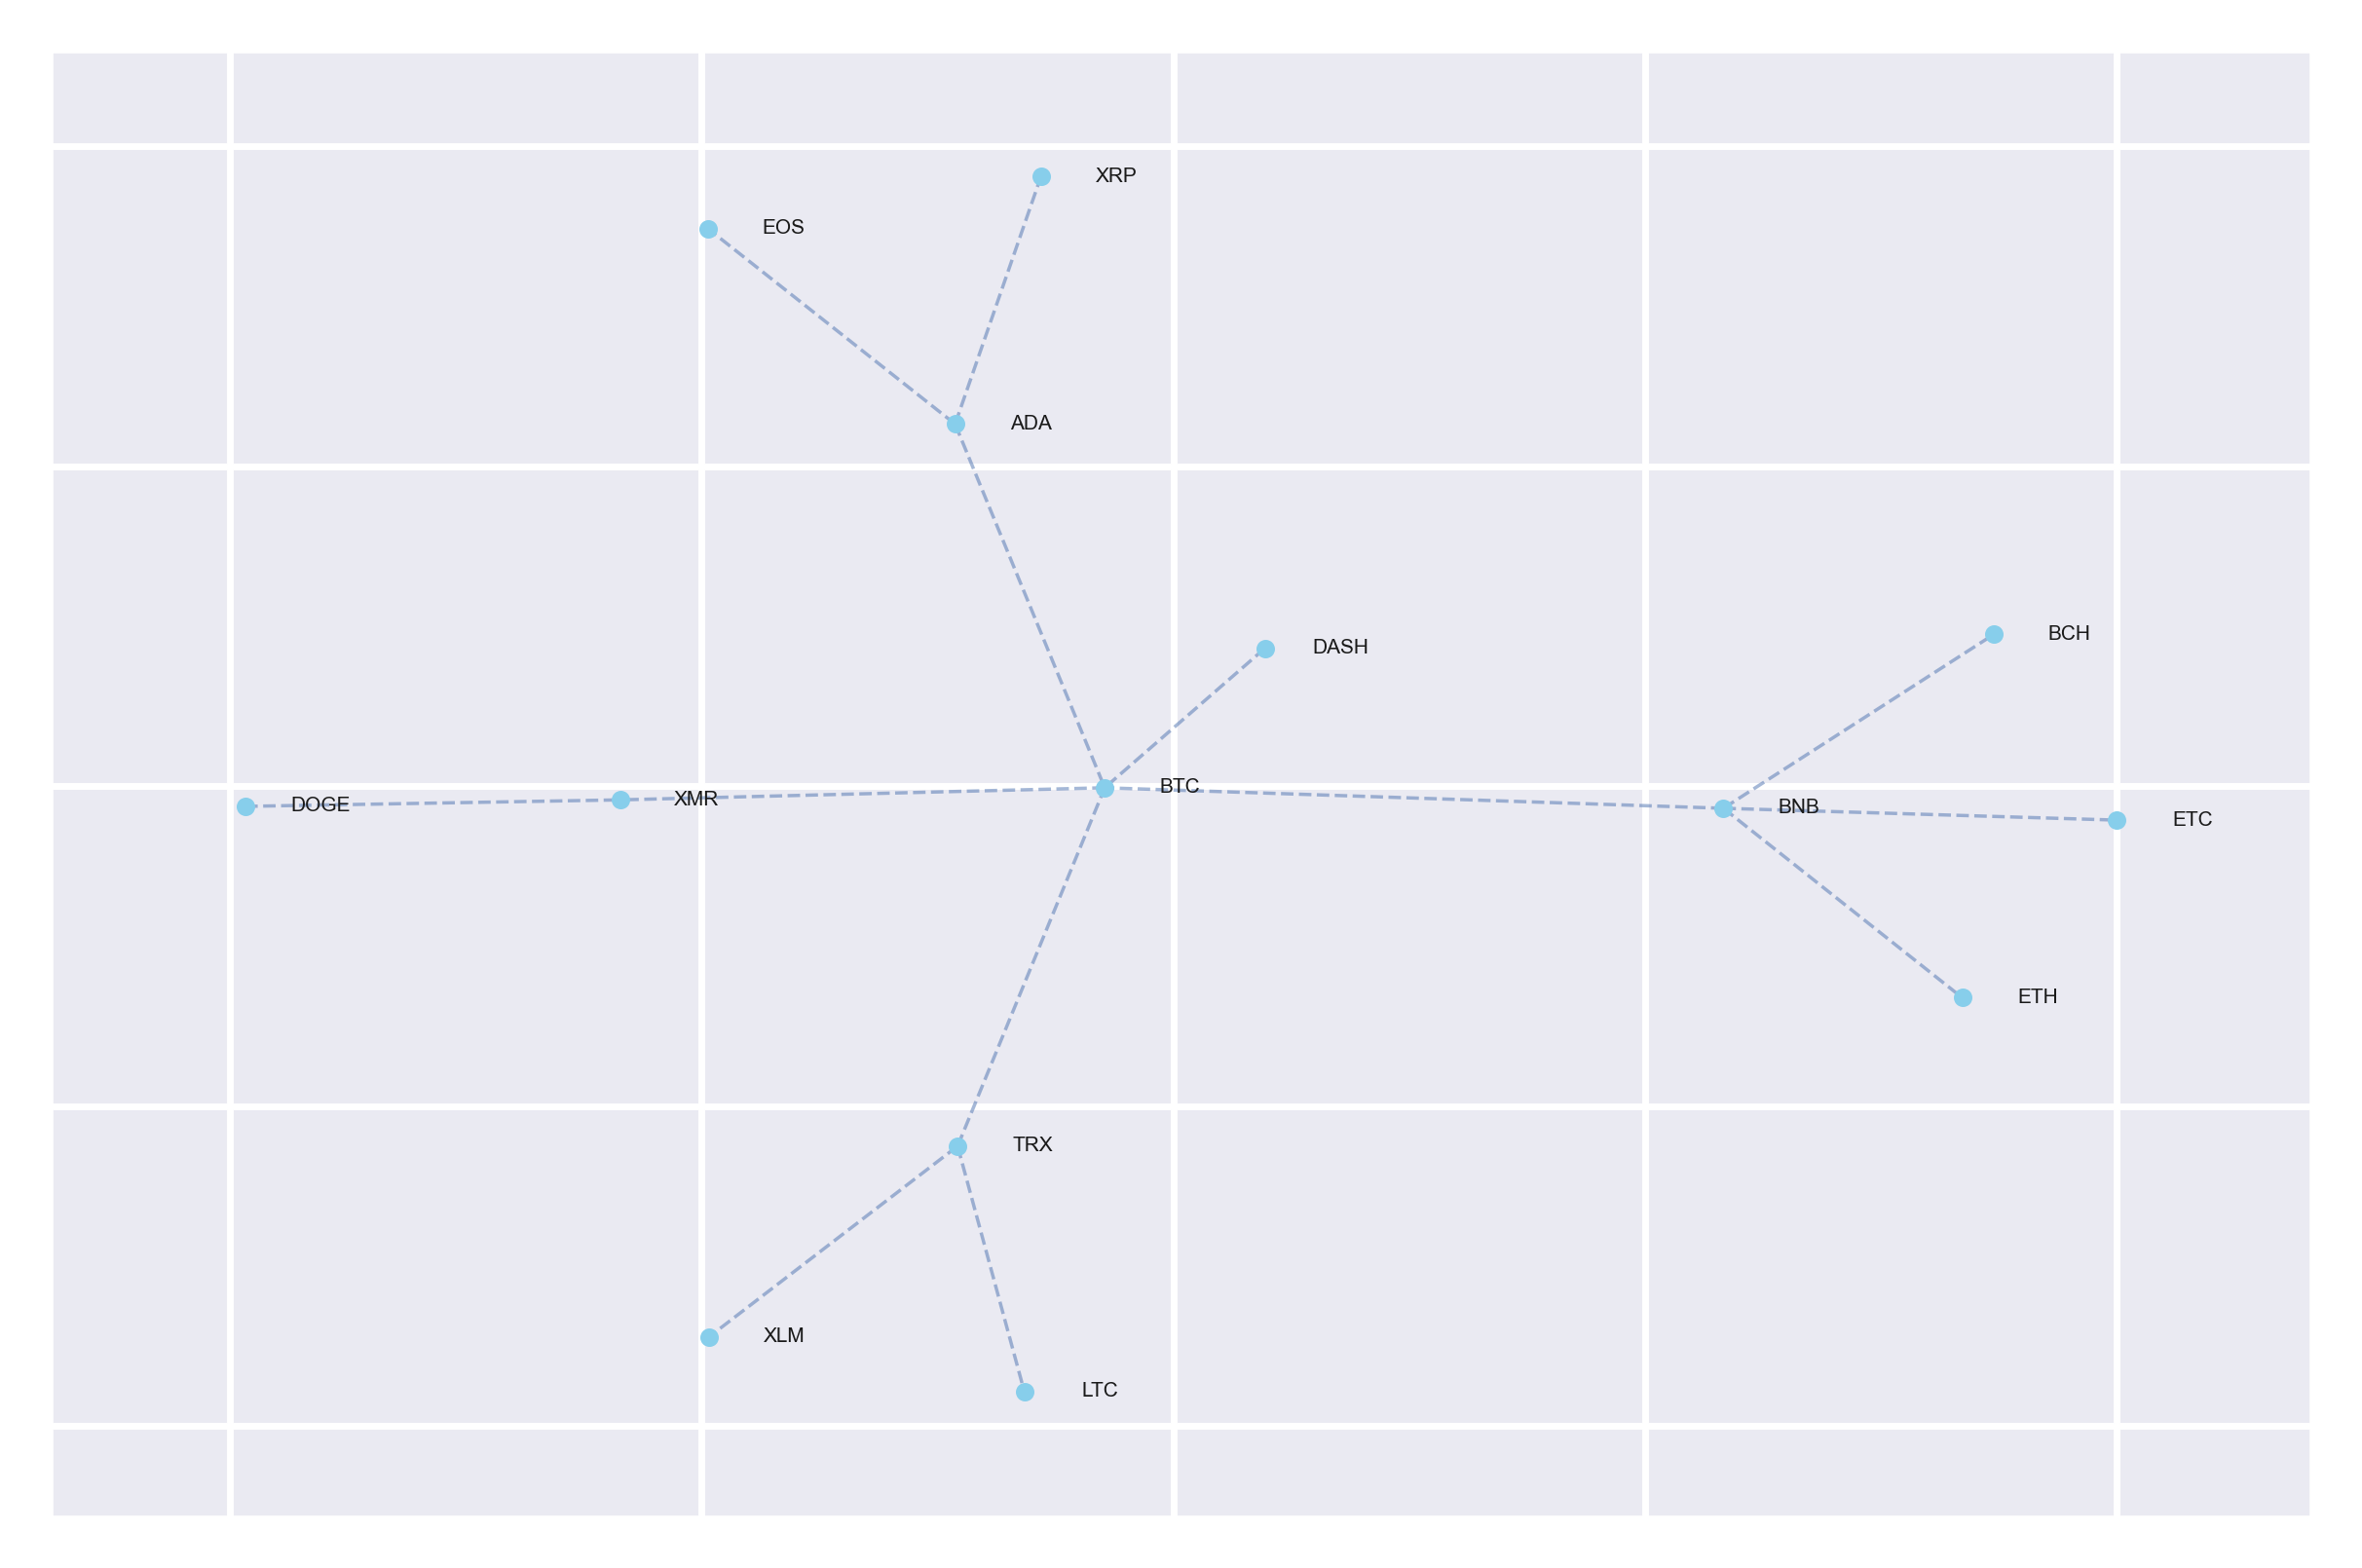

In [11]:
#The Minimum Spanning Tree Graph based on the P values
P_MAT = np.array(P_val_Dataframe)
Funcs.MST_Graph(P_MAT, cryptos)
#plt.savefig('P_values_MSTgraph.jpg')

In [5]:
#The Minimum Spanning Tree Graph based on the F-scores
F_MAT = Funcs.CalculateDistance(Funcs.ScaleData(np.array(F_val_Dataframe)))
Funcs.MST_Graph(F_MAT, cryptos)

ValueError: prime is not a valid choice for an algorithm.